In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import os
import sys
import pandas as pd
import time
import tensorflow as tf
from tensorflow import keras

print(sys.version_info)
for module in mpl,np, sklearn,pd,tf,keras:
    print(module.__name__,module.__version__)

sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
matplotlib 3.1.0
numpy 1.16.4
sklearn 0.21.2
pandas 0.24.2
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [3]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 1    #,test_size = 0.25   default, 3:1
)

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 2)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [6]:
# wide & deep 模型由两部分组成，所以不能由sequential方式来写，需要用 function api

# deep model 
input = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

# 合并两个部分， wide部分和output层直接相连
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)

# Sequential 方法已经固化好了model， function api方法要在这里固化model
model = keras.models.Model(inputs = [input],
                           outputs = [output])

model.summary()
model.compile(loss='mean_squared_error', optimizer='sgd')
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)]


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [7]:
history = model.fit(x_train_scaled, y_train,
                   validation_data = (x_valid_scaled, y_valid),
                   epochs = 100,
                   callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 200us/sample - loss: 2.4845 - val_loss: 0.8642
Epoch 2/100
11610/11610 [==============================] - 2s 152us/sample - loss: 0.8203 - val_loss: 0.7339
Epoch 3/100
11610/11610 [==============================] - 2s 150us/sample - loss: 0.7105 - val_loss: 0.6815
Epoch 4/100
11610/11610 [==============================] - 2s 155us/sample - loss: 0.6640 - val_loss: 0.6426
Epoch 5/100
11610/11610 [==============================] - 2s 151us/sample - loss: 0.6288 - val_loss: 0.6140
Epoch 6/100
11610/11610 [==============================] - 2s 152us/sample - loss: 0.6033 - val_loss: 0.5905
Epoch 7/100
11610/11610 [==============================] - 2s 151us/sample - loss: 0.5816 - val_loss: 0.5721
Epoch 8/100
11610/11610 [==============================] - 2s 149us/sample - loss: 0.5649 - val_loss: 0.5578
Epoch 9/100
11610/11610 [==============================] - 2s 149us/sample - lo

11610/11610 [==============================] - 2s 140us/sample - loss: 0.3988 - val_loss: 0.3990
Epoch 76/100
11610/11610 [==============================] - 2s 140us/sample - loss: 0.3979 - val_loss: 0.3981
Epoch 77/100
11610/11610 [==============================] - 2s 141us/sample - loss: 0.3969 - val_loss: 0.3981
Epoch 78/100
11610/11610 [==============================] - 2s 145us/sample - loss: 0.3962 - val_loss: 0.3964
Epoch 79/100
11610/11610 [==============================] - 2s 139us/sample - loss: 0.3952 - val_loss: 0.3957
Epoch 80/100
11610/11610 [==============================] - 2s 148us/sample - loss: 0.3942 - val_loss: 0.3969
Epoch 81/100
11610/11610 [==============================] - 2s 139us/sample - loss: 0.3938 - val_loss: 0.3940
Epoch 82/100
11610/11610 [==============================] - 2s 140us/sample - loss: 0.3924 - val_loss: 0.3930
Epoch 83/100
11610/11610 [==============================] - 2s 138us/sample - loss: 0.3918 - val_loss: 0.3924
Epoch 84/100
11610/1161

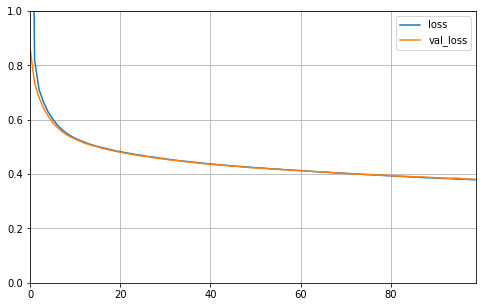

In [8]:
def plot_learnig_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learnig_curves(history)

In [9]:
model.evaluate(x_test_scaled, y_test)

5160/5160 [==============================] - 0s 86us/sample - loss: 0.4032


0.40323724876078526